In [2]:
import time
import matplotlib.pyplot as plt
from typing import List, Callable, Dict
import random
import csv
import pandas as pd

In [4]:
def merge_sort(arr: List[int]) -> List[int]:
    n = len(arr)
    # Base case
    if n <= 1:
        return arr
    # Split array in the middle
    mid = n//2
    arr1 = arr[0:mid]
    arr2 = arr[mid:]
    # Recursively split the array to be sorted
    left = merge_sort(arr1)
    right = merge_sort(arr2)
    return merge_two_sorted_arrays(left, right)

def merge_two_sorted_arrays(arr1: List[int], arr2: List[int]) -> List[int]:
    merged_arr = []
    p1, p2 = 0, 0
    while (p1 < len(arr1) and p2 < len(arr2)):
        # Adds the smallest element to the output array
        if arr1[p1] <= arr2[p2]:
            merged_arr.append(arr1[p1])
            p1 += 1
        else:
            merged_arr.append(arr2[p2])
            p2 += 1
        
    # Add any remaining elements in either input arrays to the output
    merged_arr.extend(arr1[p1:])
    merged_arr.extend(arr2[p2:])
    return merged_arr

arr = [64, 34, 25, 12, 22, 11, 90]
merge_sort(arr)

[11, 12, 22, 25, 34, 64, 90]

In [5]:
def plot_n_vs_runtime(algorithm_name: str, n_values: List[int], runtimes: List[float]):
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, runtimes, "bo-", linewidth=2, markersize=8, label=algorithm_name)
    
    # Adding labels and title
    plt.xlabel("Input Size (n)", fontsize=12)
    plt.ylabel("Runtime (seconds)", fontsize=12)
    plt.title("Algorithm Runtime vs Input Size", fontsize=14)
    
    # Add grid for better readability
    plt.grid(True, linestyle="--", alpha=0.7)
    
    # Ensure axis starts at 0
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    
    plt.show()

def calculate_runtime(input: List[int], sorting_function: Callable[[List[int]], None]) -> float:
    # Make a copy of input to avoid modifying the original list
    data = input.copy()
    
    # Record start time
    start_time = time.time()
    
    # Execute the sorting function
    sorting_function(data)
    
    # Calculate elapsed time
    end_time = time.time()
    runtime = end_time - start_time
    
    return runtime

In [ ]:
# Generate different sizes to test
n_values = list(range(1000, 1001000, 1000)) 

runtimes = []
results = []

for n in n_values:
    test_input = random.choices(range(100), k=n)
    runtime = calculate_runtime(test_input, merge_sort)
    runtimes.append(runtime)
    results.append({"n": n, "runtime": runtime})

csv_filename = "merge_sort_python.csv"
with open(csv_filename, "w", newline="") as csvfile:
    fieldnames = ["n", "runtime"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    writer.writerows(results)
    
# Plot the results
plot_n_vs_runtime("Merge-sort", n_values, runtimes)

In [ ]:
using System;
using System.Collections.Generic;
using System.Diagnostics;
using System.Linq;
using System.IO;
using System.Globalization;

In [ ]:
public class Sorter {
    public int[] MergeSort(int[] arr)
    {
        int n = arr.Length;
        if (n <= 1)
        {
            return arr;
        }
        int mid = n/2;
        int[] arr1 = arr[..mid];
        int[] arr2 = arr[mid..];
        int[] left = MergeSort(arr1);
        int[] right = MergeSort(arr2);
        return MergeTwoSortedArrays(left, right);
    }
    public int[] MergeTwoSortedArrays(int[] arr1, int[] arr2)
    {
        int[] mergedArr = new int[arr1.Length + arr2.Length];
        int p1 = 0;
        int p2 = 0;
        int p3 = 0;
        while (p1 < arr1.Length && p2 < arr2.Length)
        {
            if (arr1[p1] < arr2[p2])
            {
                mergedArr[p3++] = arr1[p1++];
            } 
            else 
            {
                mergedArr[p3++] = arr2[p2++];
            }
        }
        while (p1 < arr1.Length)
        {
            mergedArr[p3++] = arr1[p1++];
        }
        while (p2 < arr2.Length)
        {
            mergedArr[p3++] = arr2[p2++];
        }
        return mergedArr;
    }
}

In [ ]:
static double CalculateRuntime(int[] input, Func<int[], int[]> sortingFunction)
{
    var data = (int[])input.Clone();

    var stopwatch = new Stopwatch();
    stopwatch.Start();

    sortingFunction(data);

    stopwatch.Stop();
    return stopwatch.ElapsedTicks / (double)Stopwatch.Frequency;
}

In [ ]:
var sorter = new Sorter();

var nValues = Enumerable.Range(1, 1000)
    .Select(x => x * 1000) 
    .ToList();

var runtimes = new List<double>();
var random = new Random();

foreach (int n in nValues)
{
    var testInput = Enumerable.Range(0, n)
        .Select(_ => random.Next(100))
        .ToArray();

    var runtime = CalculateRuntime(testInput, sorter.MergeSort);
    runtimes.Add(runtime);
}

var csvLines = new List<string>
{
    "InputSize,RuntimeSeconds" // Header
};

for (int i = 0; i < nValues.Count; i++)
{
    csvLines.Add($"{nValues[i]},{runtimes[i]}");
}

System.IO.File.WriteAllLines("merge_sort_csharp.csv", csvLines);

In [6]:
def plot_algorithm_comparison(performance_data: Dict[str, Dict[str, List[float]]], plot_config: Dict[str, Dict[str, str]] = None) -> None:
    if plot_config is None:
        plot_config = {
            "styles": {
                "Python": "bo-",
                "C#": "ro-"
            },
            "title": "Algorithm Runtime Comparison",
            "xlabel": "Input Size (n)",
            "ylabel": "Runtime (seconds)"
        }
    
    # Set global font sizes
    plt.rcParams['font.size'] = 14  # Base font size
    plt.rcParams['axes.titlesize'] = 20  # Size for plot title
    plt.rcParams['axes.labelsize'] = 16  # Size for axis labels
    plt.rcParams['xtick.labelsize'] = 14  # Size for x-tick labels
    plt.rcParams['ytick.labelsize'] = 14  # Size for y-tick labels
    plt.rcParams['legend.fontsize'] = 14  # Size for legend text
    
    # Create the plot
    plt.figure(figsize=(12, 7))
    
    # Plot data for each implementation
    for impl_name, data in performance_data.items():
        style = plot_config["styles"].get(impl_name, "o-")
        plt.plot(
            data["sizes"],
            data["runtimes"],
            style,
            linewidth=2,
            markersize=6,
            label=impl_name,
            alpha=0.7
        )
    
    # Customize the plot
    plt.title(
        plot_config.get("title", "Algorithm Runtime Comparison"),
        fontsize=20,
        pad=20
    )
    plt.xlabel(
        plot_config.get("xlabel", "Input Size (n)"),
        fontsize=16,
        labelpad=12
    )
    plt.ylabel(
        plot_config.get("ylabel", "Runtime (seconds)"),
        fontsize=16,
        labelpad=12
    )
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend(
        fontsize=14,
        framealpha=0.9,
        loc='best',
        markerscale=1.2  # Make legend markers slightly larger
    )
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    
    # Add more padding to prevent text cutoff
    plt.tight_layout(pad=1.5)
    plt.show()

Python data points: 1000
C# data points: 1000


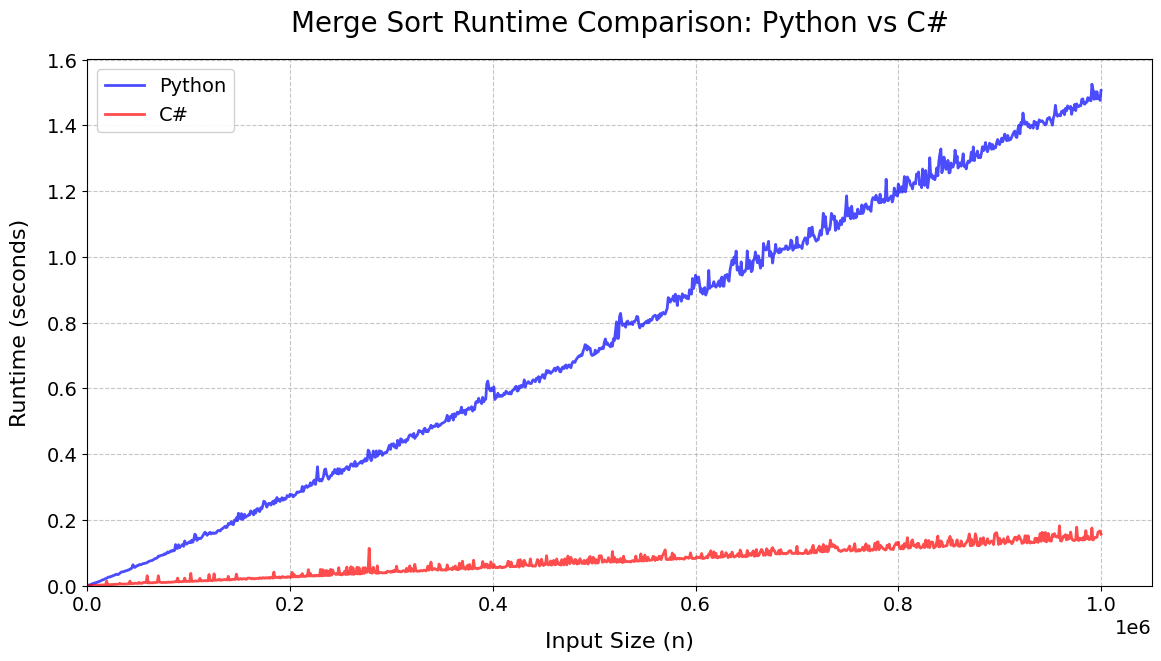

In [7]:
python_df = pd.read_csv("merge_sort_python.csv")
csharp_df = pd.read_csv("merge_sort_csharp.csv")

performance_data = {
    "Python": {
        "sizes": python_df["n"].tolist(),
        "runtimes": python_df["runtime"].tolist()
    },
    "C#": {
        "sizes": csharp_df["InputSize"].tolist(),
        "runtimes": csharp_df["RuntimeSeconds"].tolist()
    }
}

print("Python data points:", len(performance_data["Python"]["sizes"]))
print("C# data points:", len(performance_data["C#"]["sizes"]))
plot_config = {
    "styles": {
        "Python": "b-",
        "C#": "r-"
    },
    "title": "Merge Sort Runtime Comparison: Python vs C#",
    "xlabel": "Input Size (n)",
    "ylabel": "Runtime (seconds)"
}
plot_algorithm_comparison(performance_data, plot_config)